In [3]:
from pathlib import Path
import pandas as pd
import timedelta as td
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import date, datetime


In [5]:
# Ler os dados
BDFULL = pd.read_excel('DataFrame_Processos_Percentual_Base_Completa.xlsx')

# Verificar Dimensão
BDFULL.shape

(1436, 6)

In [6]:
BDFULL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DiaInicio                   1436 non-null   datetime64[ns]
 1   DtHoraInicio                1436 non-null   datetime64[ns]
 2   DtHoraFim                   1436 non-null   datetime64[ns]
 3   Processo                    1436 non-null   object        
 4   TempoMinutos                1436 non-null   int64         
 5   TempoMinutosInicioExecucao  1436 non-null   float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 67.4+ KB


In [7]:
# Mostra os processos existentes Únicos
BDFULL['Processo'].unique()

array(['Rotina_01', 'Rotina_02', 'Rotina_03', 'Rotina_04'], dtype=object)

In [8]:
# Inclui os campos de percentuais
# Incluindo Dummies
BDFULL["PercRotina_01"]=0.0
BDFULL["PercRotina_02"]=0.0
BDFULL["PercRotina_03"]=0.0
BDFULL["PercRotina_04"]=0.0

In [9]:
BDFULL.head(2)

,DiaInicio,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao,PercRotina_01,PercRotina_02,PercRotina_03,PercRotina_04
0,2021-01-05,2021-01-05 05:21:00.000001,2021-01-05 07:40:00,Rotina_01,139,321.0,0.0,0.0,0.0,0.0
1,2021-01-06,2021-01-06 04:13:00.000000,2021-01-06 05:54:00,Rotina_01,101,253.0,0.0,0.0,0.0,0.0


In [10]:
BDFULL.sort_values(by=["DtHoraInicio", "DtHoraFim"], ascending=True).head(4)

,DiaInicio,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao,PercRotina_01,PercRotina_02,PercRotina_03,PercRotina_04
359,2021-01-05,2021-01-05 00:13:00.000000,2021-01-05 01:28:00,Rotina_02,75,13.0,0.0,0.0,0.0,0.0
1077,2021-01-05,2021-01-05 02:44:00.000000,2021-01-05 06:30:00,Rotina_04,226,164.0,0.0,0.0,0.0,0.0
0,2021-01-05,2021-01-05 05:21:00.000001,2021-01-05 07:40:00,Rotina_01,139,321.0,0.0,0.0,0.0,0.0
718,2021-01-05,2021-01-05 19:15:00.000001,2021-01-06 02:17:00,Rotina_03,422,1155.0,0.0,0.0,0.0,0.0


In [11]:
DiasSemana = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]
Mes        = ["","Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out","Nov", "Dez"]

In [12]:
BDFULL["DiaSemana"] = ''
BDFULL["Mes"] = ''
for i in range(len(BDFULL.index)):
  BDFULL["DiaSemana"][i] = DiasSemana[BDFULL['DtHoraInicio'][i].weekday()]
  BDFULL["Mes"][i]       = Mes[BDFULL['DtHoraInicio'][i].month]

C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
BDFULL.head(2)

,DiaInicio,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao,PercRotina_01,PercRotina_02,PercRotina_03,PercRotina_04,DiaSemana,Mes
0,2021-01-05,2021-01-05 05:21:00.000001,2021-01-05 07:40:00,Rotina_01,139,321.0,0.0,0.0,0.0,0.0,Terça,Jan
1,2021-01-06,2021-01-06 04:13:00.000000,2021-01-06 05:54:00,Rotina_01,101,253.0,0.0,0.0,0.0,0.0,Quarta,Jan


In [14]:
# Valores Únicos
BDFULL['DiaSemana'].unique()
# Não houve processamento no Domingo

array(['Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo',
       'Segunda'], dtype=object)

In [15]:
# Cria Dummy para o dia da semana 
# Criada para avaliar se haverá ganho nas predições
BDFULL = pd.get_dummies(BDFULL, columns=["DiaSemana"])

In [16]:
BDFULL.head(3)

,DiaInicio,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao,PercRotina_01,PercRotina_02,PercRotina_03,PercRotina_04,Mes,DiaSemana_Domingo,DiaSemana_Quarta,DiaSemana_Quinta,DiaSemana_Segunda,DiaSemana_Sexta,DiaSemana_Sábado,DiaSemana_Terça
0,2021-01-05,2021-01-05 05:21:00.000001,2021-01-05 07:40:00,Rotina_01,139,321.0,0.0,0.0,0.0,0.0,Jan,0,0,0,0,0,0,1
1,2021-01-06,2021-01-06 04:13:00.000000,2021-01-06 05:54:00,Rotina_01,101,253.0,0.0,0.0,0.0,0.0,Jan,0,1,0,0,0,0,0
2,2021-01-07,2021-01-07 03:30:00.000001,2021-01-07 05:24:00,Rotina_01,114,210.0,0.0,0.0,0.0,0.0,Jan,0,0,1,0,0,0,0


In [17]:
# Incluído dia da semana novamente para realizar estatísticas
# A Dummy Dia da Semana será utilizada para avaliar se há ganhos nas predições
BDFULL["DiaSemana"] = ''
for i in range(len(BDFULL.index)):
  BDFULL["DiaSemana"][i] = DiasSemana[BDFULL['DtHoraInicio'][i].weekday()]

C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
# VERIFICAÇÃO DE OUTLIERS

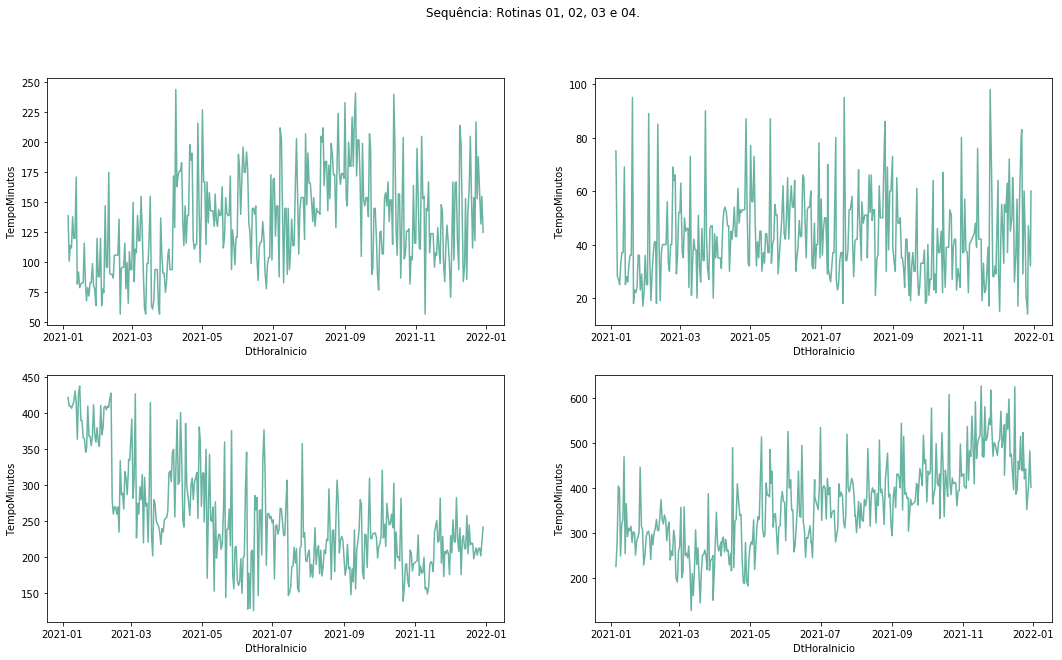

In [19]:
# Verificar se há Outliers - Gráfico Linha
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Sequência: Rotinas 01, 02, 03 e 04.')

# Grafico Rotina 01
sns.lineplot(ax=axes[0, 0], data=BDFULL[BDFULL['Processo']=='Rotina_01'], x='DtHoraInicio' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 02
sns.lineplot(ax=axes[0, 1], data=BDFULL[BDFULL['Processo']=='Rotina_02'], x='DtHoraInicio' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 03
sns.lineplot(ax=axes[1, 0], data=BDFULL[BDFULL['Processo']=='Rotina_03'], x='DtHoraInicio' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 04
sns.lineplot(ax=axes[1, 1], data=BDFULL[BDFULL['Processo']=='Rotina_04'], x='DtHoraInicio' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )


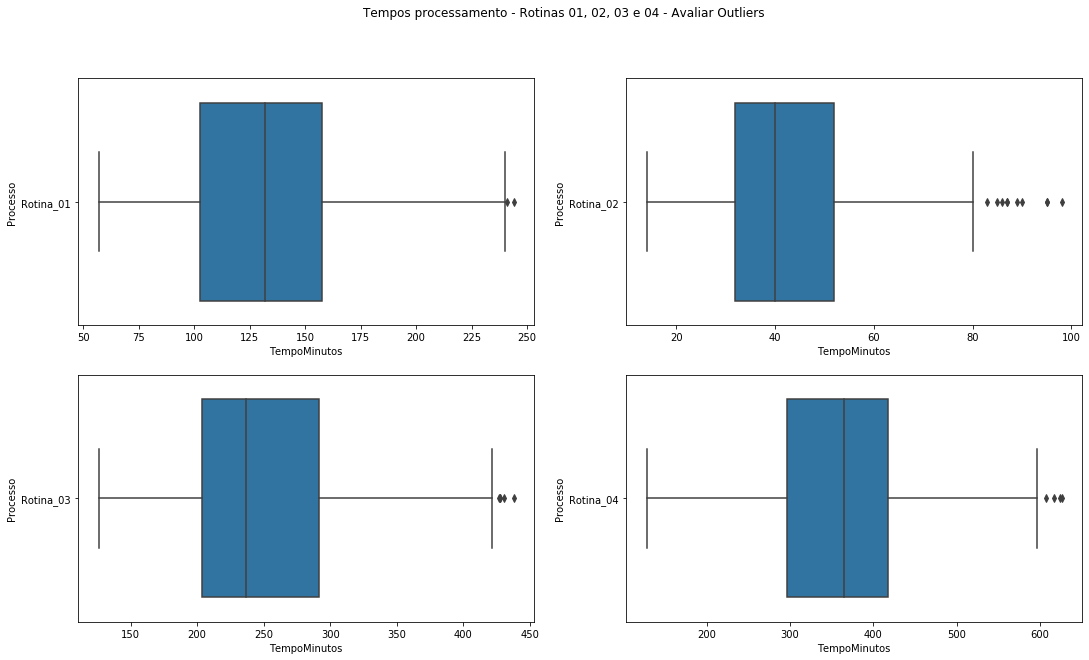

In [20]:
# Verificar se há Outliers - BoxPlot
# Exemplos com múltiplos gráficos
# https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py
# https://stackabuse.com/seaborn-box-plot-tutorial-and-examples/

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Tempos processamento - Rotinas 01, 02, 03 e 04 - Avaliar Outliers')

# Grafico Rotina 01
sns.boxplot(ax=axes[0, 0], x="TempoMinutos", y="Processo", data=BDFULL.loc[(BDFULL['Processo']=='Rotina_01')])

# Grafico Rotina 02
sns.boxplot(ax=axes[0, 1], x="TempoMinutos", y="Processo", data=BDFULL.loc[(BDFULL['Processo']=='Rotina_02')])

# Grafico Rotina 03
sns.boxplot(ax=axes[1, 0], x="TempoMinutos", y="Processo", data=BDFULL.loc[(BDFULL['Processo']=='Rotina_03')])

# Grafico Rotina 04
sns.boxplot(ax=axes[1, 1], x="TempoMinutos", y="Processo", data=BDFULL.loc[(BDFULL['Processo']=='Rotina_04')])

plt.show()

In [22]:
# Conforme gráficos acima, é possível avaliar alguns Outliers - a única informação que temos sobre a base é que em alguns casos 
# houveram processos mais lentos, ou por cargas maiores exporádicas ou por problemas no servidor de Banco de Dados
# Neste cenário iremos ajustar os dados pelas médias entre +/- 5 dias de processamento
# Não podemos deixar sem uma data de processamento devido a série temporal exigir todos os dias

In [24]:
# Determinando os Quartis - rodar para os 4 processos

# https://acervolima.com/box-plot/
# Achar o valor 100% no Boxplot, desprezando os OutLiers
# Muitos outliers são devidos a cargas fora do padrão ou erros de produção, que podem interferir na avaliação
# Iremos excluir os mesmos e trabalhar apenas com os dados limpos
Q1 = BDFULL.loc[(BDFULL['Processo']=='Rotina_04')]['TempoMinutos'].quantile(0.25)
Q3 = BDFULL.loc[(BDFULL['Processo']=='Rotina_04')]['TempoMinutos'].quantile(0.75)
IQR=Q3-Q1
Upper=Q3+1.5*IQR
print(Upper)

# O trecho acima foi executados para os processo das Rotinas 01 a Rotina 04.

# Valores maiores que as relações abaixo serão excluídas
# Processo 1: 240.00 --> apenas 2 casos com tempo de 241 e 244 - não será alterado
# Processo 2:  82.00 --> ajustes no próximo bloco
# Processo 3: 422.00 --> sem nenhuma ocorrência
# Processo 4: 599.00 --> ajustes no próximo bloco

599.5


In [47]:
# Avaliando os Outliers do Dataframe

df_outliers = (BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['TempoMinutos']>240) |
                          (BDFULL['Processo']=='Rotina_02') & (BDFULL['TempoMinutos']>82) |
                          (BDFULL['Processo']=='Rotina_03') & (BDFULL['TempoMinutos']>442) |
                          (BDFULL['Processo']=='Rotina_04') & (BDFULL['TempoMinutos']>599)]   ) 

df_outliers


#df_outliers.index
# BDFULL = BDFULL.drop(df_remove.index) 

,DiaInicio,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao,PercRotina_01,PercRotina_02,PercRotina_03,PercRotina_04,Mes,DiaSemana_Domingo,DiaSemana_Quarta,DiaSemana_Quinta,DiaSemana_Segunda,DiaSemana_Sexta,DiaSemana_Sábado,DiaSemana_Terça,DiaSemana
93,2021-04-08,2021-04-08 03:56:00,2021-04-08 08:00:00,Rotina_01,244,236.0,0.0,0.0,0.0,0.0,Abr,0,0,1,0,0,0,0,Quinta
248,2021-09-10,2021-09-10 05:10:00,2021-09-10 09:11:00,Rotina_01,241,310.0,0.0,0.0,0.0,0.0,Set,0,0,0,0,1,0,0,Sexta


In [42]:
#Tempos a serem ajustados
"""
Id      Data         Rotina     Tempo       Novo Tempo - média +/- 5 dias
373	    2021-01-19	 Rotina_02	95          28
387	    2021-02-02	 Rotina_02	89          28
395	    2021-02-10	 Rotina_02	85          34
436	    2021-03-23	 Rotina_02	90          36
471	    2021-04-27	 Rotina_02	87          51
492	    2021-05-18	 Rotina_02	87          41
556	    2021-07-21	 Rotina_02	95          36
591	    2021-08-25	 Rotina_02	86          55
682	    2021-11-24	 Rotina_02	98          31
709	    2021-12-21	 Rotina_02	83          41
1364	2021-10-19	 Rotina_04	607        405
1392	2021-11-16	 Rotina_04	626        511
1401	2021-11-25	 Rotina_04	617        515
1421	2021-12-15	 Rotina_04	624        456
"""

'\nId      Data         Rotina     Tempo       Novo Tempo - média +/- 5 dias\n373\t    2021-01-19\t Rotina_02\t95          28\n387\t    2021-02-02\t Rotina_02\t89          28\n395\t    2021-02-10\t Rotina_02\t85          34\n436\t    2021-03-23\t Rotina_02\t90          36\n471\t    2021-04-27\t Rotina_02\t87          51\n492\t    2021-05-18\t Rotina_02\t87          41\n556\t    2021-07-21\t Rotina_02\t95          36\n591\t    2021-08-25\t Rotina_02\t86          55\n682\t    2021-11-24\t Rotina_02\t98          31\n709\t    2021-12-21\t Rotina_02\t83          41\n1364\t2021-10-19\t Rotina_04\t607        405\n1392\t2021-11-16\t Rotina_04\t626        511\n1401\t2021-11-25\t Rotina_04\t617        515\n1421\t2021-12-15\t Rotina_04\t624        456\n'

In [43]:
# Ajuste dos tempos dos Outliers
#  Novo Tempo - média -/+ 5 dias ( 5 dias para trás e 5 dias para frente)
BDFULL['TempoMinutos'][373]  =  28
BDFULL['TempoMinutos'][387]  =  28
BDFULL['TempoMinutos'][395]  =  34
BDFULL['TempoMinutos'][436]  =  36
BDFULL['TempoMinutos'][471]  =  51
BDFULL['TempoMinutos'][492]  =  41
BDFULL['TempoMinutos'][556]  =  36
BDFULL['TempoMinutos'][591]  =  55
BDFULL['TempoMinutos'][682]  =  31
BDFULL['TempoMinutos'][709]  =  41
BDFULL['TempoMinutos'][1364] = 405
BDFULL['TempoMinutos'][1392] = 511
BDFULL['TempoMinutos'][1401] = 515
BDFULL['TempoMinutos'][1421] = 456

C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [45]:
print(BDFULL['TempoMinutos'][373])
print(BDFULL['TempoMinutos'][1421])

28
456


In [48]:
# Avaliando os fatores por processos
factor = pd.qcut(BDFULL.loc[(BDFULL['Processo']=='Rotina_01')]['TempoMinutos'], [0, 0.25, 0.5, 0.75, 1])
factor
pd.value_counts(factor)

(56.999, 102.5]    90
(102.5, 132.0]     90
(157.5, 244.0]     90
(132.0, 157.5]     89
Name: TempoMinutos, dtype: int64

In [49]:
BDFULL.loc[(BDFULL['Processo']=='Rotina_01')]['TempoMinutos'].describe()

count    359.000000
mean     133.615599
std       39.717823
min       57.000000
25%      102.500000
50%      132.000000
75%      157.500000
max      244.000000
Name: TempoMinutos, dtype: float64

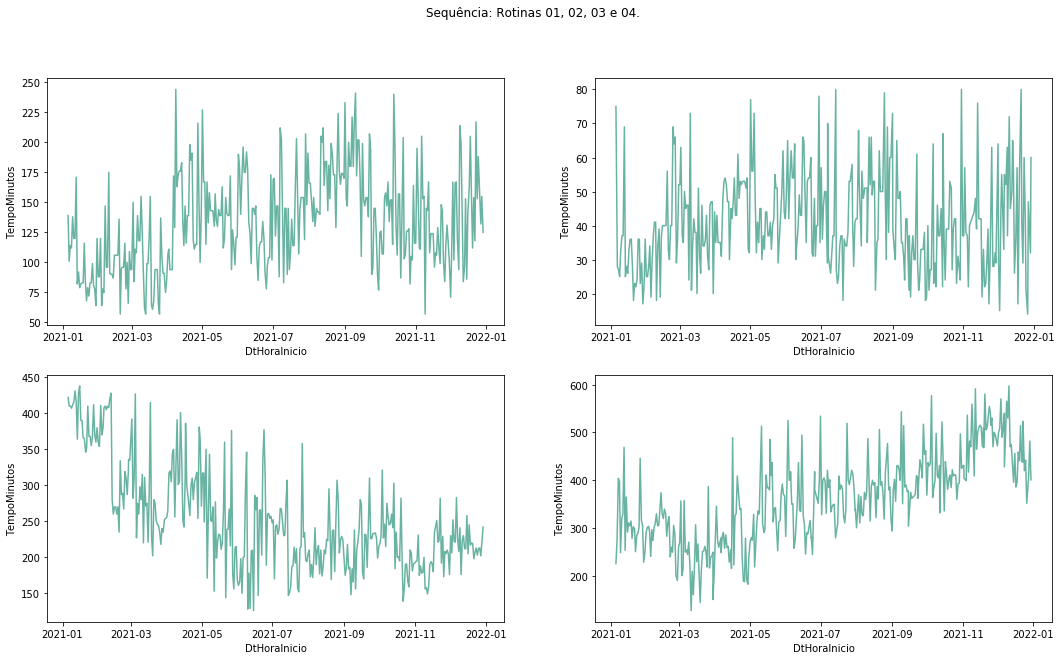

In [50]:
# Avaliando os gráficos após retirada dos Outliers
# Verificar se há Outliers - Gráfico Linha
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Sequência: Rotinas 01, 02, 03 e 04.')

# Grafico Rotina 01
sns.lineplot(ax=axes[0, 0], data=BDFULL[BDFULL['Processo']=='Rotina_01'], x='DtHoraInicio' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 02
sns.lineplot(ax=axes[0, 1], data=BDFULL[BDFULL['Processo']=='Rotina_02'], x='DtHoraInicio' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 03
sns.lineplot(ax=axes[1, 0], data=BDFULL[BDFULL['Processo']=='Rotina_03'], x='DtHoraInicio' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 04
sns.lineplot(ax=axes[1, 1], data=BDFULL[BDFULL['Processo']=='Rotina_04'], x='DtHoraInicio' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )


In [51]:
# Define lista para iteração nos processos
processos = ["Rotina_01",
             "Rotina_02",
             "Rotina_03",
             "Rotina_04"]

In [52]:
# Calcula os processos concorrentes

In [53]:
# Função para verificar concorrência de processos com 100% do tempo
def verificarConcorrencia_Processo(processo, dtIni, dtFim):
    # iterar em todas execuções do referido processo
    for i in BDFULL[BDFULL["Processo"]==processo].sort_values(by=["DtHoraInicio"], ascending=True).index: 
        # a última parte do OR é para pegar os casos de 100% de concorrência
        if (BDFULL[BDFULL["Processo"]==processo]["DtHoraInicio"][i]>= dtIni and BDFULL[BDFULL["Processo"]==processo]["DtHoraInicio"][i]<= dtFim) or (BDFULL[BDFULL["Processo"]==processo]["DtHoraFim"][i]>= dtIni and BDFULL[BDFULL["Processo"]==processo]["DtHoraFim"][i]<= dtFim) or (BDFULL[BDFULL["Processo"]==processo]["DtHoraInicio"][i]<= dtIni and BDFULL[BDFULL["Processo"]==processo]["DtHoraFim"][i]>= dtFim):
            # pega início e fim do processo concorrente
            StartConcorrente = BDFULL["DtHoraInicio"][i]
            FinishConcorrente = BDFULL["DtHoraFim"][i]
            # adequa início e fim do processo concorrente para dentro do range do processo principal para estimar tempo rodando em paralelo
            if StartConcorrente < dtIni:
                StartConcorrente = dtIni
            if FinishConcorrente > dtFim:
                FinishConcorrente = dtFim
            # avaliar tempo gasto na concorrência (do processo concorrente)
            tempoConcorrente = td.Timedelta(FinishConcorrente - StartConcorrente).total.minutes
            # avaliar tempo gasto na concorrência (do processo principal)            
            tempoPrincipal = td.Timedelta(dtFim - dtIni).total.minutes
            # avaliar percentual do tempo com concorrência
            percentualConcorrencia = tempoConcorrente/tempoPrincipal
            return percentualConcorrencia
    return 0

In [54]:
# Itera nos processos verificando as concorrências
# Multiplicação por 1 é para converter FALSE e TRUE em zero e um respectivamente
start = time.time()
for p in range(len(processos)):
    print(processos[p])
    for i in BDFULL[BDFULL["Processo"]==processos[p]].index: 
         # Caso seja a mesma rotina o percentual é 100% (Não existe concorrência, pois é ela própria)
        
         # Processo "Rotina_01"
         if processos[p] == "Rotina_01":
             BDFULL["PercRotina_01"][i] = 1.00
         else:
             BDFULL["PercRotina_01"][i] = verificarConcorrencia_Processo("Rotina_01", BDFULL["DtHoraInicio"][i], BDFULL["DtHoraFim"][i]) * 1.00
         
         # Processo "Rotina_02"
         if processos[p] == "Rotina_02":
             BDFULL["PercRotina_02"][i] = 1.00
         else:
             BDFULL["PercRotina_02"][i] = verificarConcorrencia_Processo("Rotina_02", BDFULL["DtHoraInicio"][i], BDFULL["DtHoraFim"][i]) * 1.00
        
         # Processo "Rotina_03"
         if processos[p] == "Rotina_03":
             BDFULL["PercRotina_03"][i] = 1.00
         else:
             BDFULL["PercRotina_03"][i] = verificarConcorrencia_Processo("Rotina_03", BDFULL["DtHoraInicio"][i], BDFULL["DtHoraFim"][i]) * 1.00
        
         # Processo "Rotina_04"
         if processos[p] == "Rotina_04":
             BDFULL["PercRotina_04"][i] = 1.00
         else:
             BDFULL["PercRotina_04"][i] = verificarConcorrencia_Processo("Rotina_04", BDFULL["DtHoraInicio"][i], BDFULL["DtHoraFim"][i]) * 1.00

# mostra o tempo total de processamento
end = time.time()
print('Tempo total de processamento: ', round((end - start)/60.0, 2))
                
# Tempo total de processamento: 52.35 (antes 21.8 min)

Rotina_01


C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Michael\anaconda3\lib\site-

Rotina_02


C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Rotina_03


C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Rotina_04


C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Tempo total de processamento:  52.35


In [55]:
BDFULL.to_excel('DataFrame_Processos_Percentual_Todos.xlsx', index = False)

In [65]:
# Avaliar:
# Médias de tempo (por mês) com concorrência, avaliando por percentuais de concorrência (avaliar a parte de qto % há 
# um maior impacto)

In [70]:
print("Concorrência Rotina 01")
BDFULL.loc[ (BDFULL['Processo']!='Rotina_01') & (BDFULL['PercRotina_01']>0.0)].groupby(['Processo', 'Mes'] ).PercRotina_01.count()

Concorrência Rotina 01


Processo   Mes
Rotina_02  Abr    20
           Ago    11
           Dez     6
           Fev    15
           Jan    23
           Jul    22
           Jun    21
           Mai    21
           Mar    23
           Nov    10
           Out    19
           Set    18
Rotina_03  Abr     3
           Fev     5
           Jan     1
           Mai     1
           Nov     1
Rotina_04  Abr    24
           Ago    11
           Dez    22
           Fev    23
           Jan    26
           Jul    14
           Jun    26
           Mai    24
           Mar    19
           Nov    23
           Out    25
           Set    18
Name: PercRotina_01, dtype: int64

In [71]:
print("Concorrência Rotina 02")
BDFULL.loc[ (BDFULL['Processo']!='Rotina_02') & (BDFULL['PercRotina_02']>0.0)].groupby(['Processo', 'Mes'] ).PercRotina_02.count()

Concorrência Rotina 02


Processo   Mes
Rotina_01  Abr    20
           Ago    11
           Dez     6
           Fev    15
           Jan    23
           Jul    22
           Jun    21
           Mai    21
           Mar    23
           Nov    10
           Out    19
           Set    18
Rotina_03  Abr     5
           Ago     6
           Dez     5
           Fev     5
           Jan     2
           Jul     3
           Mai     1
           Mar     3
           Nov     1
           Out     2
           Set     2
Rotina_04  Abr    15
           Ago     6
           Dez    11
           Fev    21
           Jan    23
           Jul     7
           Jun    13
           Mai    15
           Mar    14
           Nov    23
           Out    11
           Set    10
Name: PercRotina_02, dtype: int64

In [72]:
print("Concorrência Rotina 03")
BDFULL.loc[ (BDFULL['Processo']!='Rotina_03') & (BDFULL['PercRotina_03']>0.0)].groupby(['Processo', 'Mes'] ).PercRotina_03.count()

Concorrência Rotina 03


Processo   Mes
Rotina_01  Abr     3
           Fev     5
           Jan     1
           Mai     1
           Nov     1
Rotina_02  Abr     5
           Ago     5
           Dez     5
           Fev     5
           Jan     2
           Jul     3
           Mai     1
           Mar     3
           Nov     1
           Out     2
           Set     3
Rotina_04  Abr     9
           Ago    17
           Dez    13
           Fev     5
           Jan     3
           Jul    12
           Jun     8
           Mai     7
           Mar     7
           Nov    10
           Out    14
           Set    15
Name: PercRotina_03, dtype: int64

In [74]:
print("Concorrência Rotina 04")
BDFULL.loc[ (BDFULL['Processo']!='Rotina_04') & (BDFULL['PercRotina_04']>0.0)].groupby(['Processo', 'Mes'] ).PercRotina_04.count()

Concorrência Rotina 04


Processo   Mes
Rotina_01  Abr    24
           Ago     9
           Dez    20
           Fev    23
           Jan    26
           Jul    14
           Jun    23
           Mai    23
           Mar    19
           Nov    22
           Out    24
           Set    16
Rotina_02  Abr    15
           Ago     5
           Dez    11
           Fev    21
           Jan    23
           Jul     8
           Jun    12
           Mai    14
           Mar    13
           Nov    21
           Out    11
           Set    10
Rotina_03  Abr     8
           Ago    17
           Dez    13
           Fev     5
           Jan     3
           Jul    11
           Jun     8
           Mai     6
           Mar     7
           Nov    10
           Out    13
           Set    15
Name: PercRotina_04, dtype: int64

In [ ]:
# Conforme levantamento acima, existem as seguintes concorrências:
# - Rotina 01: tem processos concorrentes com a Rotina 02 e a Rotina 04
# - Rotina 02: tem processos concorrentes com a Rotina 01 e a Rotina 04
# - Rotina 03: pouquíssimos processos concorrentes - a mesma será desconsiderada    
# - Rotina 04: tem processos concorrentes com a Rotina 01 e a Rotina 02

# Próximo passo: avaliar se essa concorrência interferiu nos tempos de execução


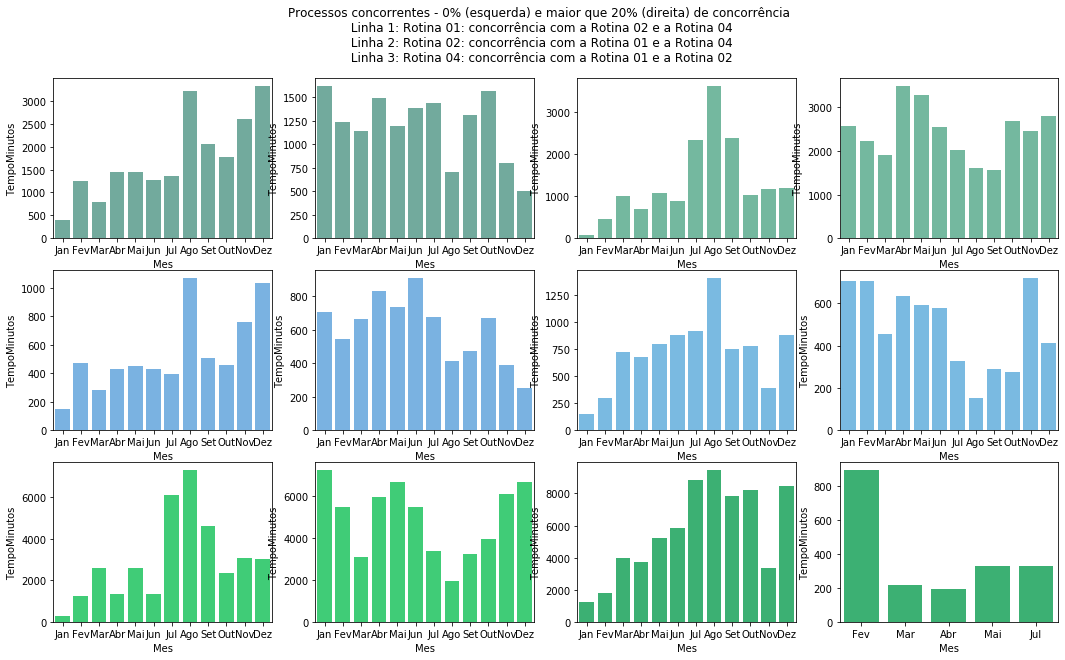

In [109]:
# Comparativo dos tempos de concorrência a 0% e 20%

titulo = ('Processos concorrentes - 0% (esquerda) e maior que 20% (direita) de concorrência' +
          '\n Linha 1: Rotina 01: concorrência com a Rotina 02 e a Rotina 04' +
          '\n Linha 2: Rotina 02: concorrência com a Rotina 01 e a Rotina 04' + 
          '\n Linha 3: Rotina 04: concorrência com a Rotina 01 e a Rotina 02' )
            

fig, axes = plt.subplots(3, 4, figsize=(18, 10))
fig.suptitle(titulo)

# Rotina 01
# Grafico Rotina 01 com Rotina 02 a zero %
sns.barplot(ax=axes[0, 0], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_02']==0)], x='Mes' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 01 com Rotina 02 a 20 %
sns.barplot(ax=axes[0, 1], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_02']>=0.2)], x='Mes' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 01 com Rotina 04 a zero %
sns.barplot(ax=axes[0, 2], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_04']==0)], x='Mes' , y='TempoMinutos', ci=None, color='#69c3a2', estimator=sum )

# Grafico Rotina 01 com Rotina 04 a 20 %
sns.barplot(ax=axes[0, 3], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_04']>=0.2)], x='Mes' , y='TempoMinutos', ci=None, color='#69c3a2', estimator=sum )


# Rotina 02
# Grafico Rotina 02 com Rotina 01 a zero %
sns.barplot(ax=axes[1, 0], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_01']==0)], x='Mes' , y='TempoMinutos', ci=None, color='#69b3f2', estimator=sum )

# Grafico Rotina 02 com Rotina 01 a 20 %
sns.barplot(ax=axes[1, 1], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_01']>=0.2)], x='Mes' , y='TempoMinutos', ci=None, color='#69b3f2', estimator=sum )

# Grafico Rotina 02 com Rotina 04 a zero %
sns.barplot(ax=axes[1, 2], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_04']==0)], x='Mes' , y='TempoMinutos', ci=None, color='#69bef2', estimator=sum )

# Grafico Rotina 02 com Rotina 04 a 20 %
sns.barplot(ax=axes[1, 3], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_04']>=0.2)], x='Mes' , y='TempoMinutos', ci=None, color='#69bef2', estimator=sum )


# Rotina 04
# Grafico Rotina 04 com Rotina 01 a zero %
sns.barplot(ax=axes[2, 0], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']==0)], x='Mes' , y='TempoMinutos', ci=None, color='#29e372', estimator=sum )

# Grafico Rotina 04 com Rotina 01 a 20 %
sns.barplot(ax=axes[2, 1], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>=0.2)], x='Mes' , y='TempoMinutos', ci=None, color='#29e372', estimator=sum )

# Grafico Rotina 04 com Rotina 02 a zero %
sns.barplot(ax=axes[2, 2], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_02']==0)], x='Mes' , y='TempoMinutos', ci=None, color='#29c372', estimator=sum )

# Grafico Rotina 04 com Rotina 04 a 20 %
sns.barplot(ax=axes[2, 3], data=BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_02']>=0.2)], x='Mes' , y='TempoMinutos', ci=None, color='#29c372', estimator=sum )



In [ ]:
# Pela análise visual, aparenta haver impacto nos processos das Rotina 01 e 04, observando a média geral.
# A Rotina 02 com a Rotina 01 também parece haver um certo aumento

# Próxima passo: avaliar pelo cálculo matemático

In [77]:
def mostrarPercentuaisConcorrencia_Processo(percentual):
    print("Percentual: ", percentual*100, "%" )
    print("Total de processos Rotina 01: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_01')]['Processo'].count())
    print("Rotina 01 com Percentual Rotina 02 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_02']>percentual)]['Processo'].count())
    print("Rotina 01 com Percentual Rotina 03 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_03']>percentual)]['Processo'].count())
    print("Rotina 01 com Percentual Rotina 04 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_04']>percentual)]['Processo'].count())
    print()
    print("Total de processos Rotina 02: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_02')]['Processo'].count())
    print("Rotina 02 com Percentual Rotina 01 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_01']>percentual)]['Processo'].count())
    print("Rotina 02 com Percentual Rotina 03 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_03']>percentual)]['Processo'].count())
    print("Rotina 02 com Percentual Rotina 04 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_04']>percentual)]['Processo'].count())
    print()
    print("Total de processos Rotina 03: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_03')]['Processo'].count())
    print("Rotina 03 com Percentual Rotina 01 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_03') & (BDFULL['PercRotina_01']>percentual)]['Processo'].count())
    print("Rotina 03 com Percentual Rotina 02 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_03') & (BDFULL['PercRotina_02']>percentual)]['Processo'].count())
    print("Rotina 03 com Percentual Rotina 04 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_03') & (BDFULL['PercRotina_04']>percentual)]['Processo'].count())
    print()
    print("Total de processos Rotina 04: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_04')]['Processo'].count())
    print("Rotina 04 com Percentual Rotina 01 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>percentual)]['Processo'].count())
    print("Rotina 04 com Percentual Rotina 02 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_02']>percentual)]['Processo'].count())
    print("Rotina 04 com Percentual Rotina 03 - Total: ", BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_03']>percentual)]['Processo'].count())
    print()
    print()

In [78]:
# Imprime concorrências
mostrarPercentuaisConcorrencia_Processo(0.01)
mostrarPercentuaisConcorrencia_Processo(0.05)
mostrarPercentuaisConcorrencia_Processo(0.10)
mostrarPercentuaisConcorrencia_Processo(0.15)
mostrarPercentuaisConcorrencia_Processo(0.20)

# Conforme levantamento feito anteriormente, é possível avaliar a quantidade de processo concorrentes, porém somente pela quantidade 
# de processo não é possível chegar a um parâmetro
# - Rotina 01: tem processos concorrentes com a Rotina 02 e a Rotina 04
# - Rotina 02: tem processos concorrentes com a Rotina 01 e a Rotina 04
# - Rotina 03: pouquíssimos processos concorrentes - a mesma será desconsiderada  
# - Rotina 04: tem processos concorrentes com a Rotina 01 e a Rotina 02 ( * rotina 02 mais concorrência até 5%)


# Próximo passo: avaliar os percentuais de concorrência

Percentual:  1.0 %
Total de processos Rotina 01:  359
Rotina 01 com Percentual Rotina 02 - Total:  201
Rotina 01 com Percentual Rotina 03 - Total:  11
Rotina 01 com Percentual Rotina 04 - Total:  243

Total de processos Rotina 02:  359
Rotina 02 com Percentual Rotina 01 - Total:  209
Rotina 02 com Percentual Rotina 03 - Total:  35
Rotina 02 com Percentual Rotina 04 - Total:  164

Total de processos Rotina 03:  359
Rotina 03 com Percentual Rotina 01 - Total:  11
Rotina 03 com Percentual Rotina 02 - Total:  34
Rotina 03 com Percentual Rotina 04 - Total:  78

Total de processos Rotina 04:  359
Rotina 04 com Percentual Rotina 01 - Total:  254
Rotina 04 com Percentual Rotina 02 - Total:  164
Rotina 04 com Percentual Rotina 03 - Total:  72


Percentual:  5.0 %
Total de processos Rotina 01:  359
Rotina 01 com Percentual Rotina 02 - Total:  186
Rotina 01 com Percentual Rotina 03 - Total:  11
Rotina 01 com Percentual Rotina 04 - Total:  237

Total de processos Rotina 02:  359
Rotina 02 com Perc

In [86]:
# Concorrência: Rotina 01 com Rotina 02 
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_02']==0)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_02']>0.01)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_02']>0.1)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_02']>0.15)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_02']>0.2)]['TempoMinutos'].mean())

# Os tempos são praticamente os mesmos, havendo ou não concorrência entre ambas, portanto podemos considerar que não há
# impacto neste cenário, descartando a relação Rotina 01 x Rotina 02
# Pode-se observar que sem concorrência houve um maior tempo médio de processamento

#0  % 139.52
#1  % 128.70
#10 % 130.12
#15 % 127.01
#20 % 122.33

# DESCARTAR

139.52
128.69651741293532
130.12269938650306
127.01369863013699
122.33043478260869


In [87]:
# Concorrência: Rotina 02 com Rotina 01
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_01']==0)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_01']>0.01)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_01']>0.1)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_01']>0.15)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_02') & (BDFULL['PercRotina_01']>0.2)]['TempoMinutos'].mean())

# Os tempos são praticamente os mesmos, havendo ou não concorrência entre ambas, portanto podemos considerar que não há
# impacto neste cenário, descartando a relação Rotina 02 x Rotina 01
# Pode-se observar que sem concorrência houve um maior tempo médio de processamento

#0  % 42.93
#1  % 40.15
#10 % 40.18
#15 % 40.03
#20 % 39.97

# DESCARTAR

42.93333333333333
40.14832535885167
40.180851063829785
40.03243243243243
39.967032967032964


In [89]:
# Concorrência: Rotina 01 com Rotina 04 
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_04']==0)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_04']>0.01)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_04']>0.1)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_04']>0.15)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_01') & (BDFULL['PercRotina_04']>0.2)]['TempoMinutos'].mean())

# Os tempos são praticamente os mesmos, havendo ou não concorrência entre ambas, portanto podemos considerar que não há
# impacto neste cenário, descartando a relação Rotina 01 x Rotina 04
# Pode-se observar que sem concorrência houve um maior tempo médio de processamento

#0  % 136.95
#1  % 132.02
#10 % 131.09
#15 % 130.67
#20 % 130.69

# DESCARTAR

136.94827586206895
132.02469135802468
131.0897435897436
130.66666666666666
130.695067264574


In [95]:
# Concorrência: Rotina 04 com Rotina 01
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']==0)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0.01)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0.1)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0.15)]['TempoMinutos'].mean())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0.2)]['TempoMinutos'].mean())

print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04')]['TempoMinutos'].count(), 'casos')
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']==0)]['TempoMinutos'].count())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0.01)]['TempoMinutos'].count())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0.1)]['TempoMinutos'].count())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0.15)]['TempoMinutos'].count())
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0.2)]['TempoMinutos'].count())


# Houve um aumento de quase 10% no tempo médio nos casos com concorrência, portanto podemos considerar que há
# impacto neste cenário, considerando inicialmente a relação Rotina 04 x Rotina 01 - podemos avaliar também
# que a partir de 1% de concorrência mantém o tempo médio de processamento

# 359 casos
#0  % 345.31 - 104 casos
#1  % 370.29 - 254 casos
#10 % 370.11 - 227 casos
#15 % 365.43 - 198 casos
#20 % 358.77 - 165 casos


345.3076923076923
370.29133858267716
370.11453744493394
365.42929292929296
358.76969696969695
359 casos
104
254
227
198
165


In [ ]:
# CENÁRIO A SER AVALIADO

# Concorrência: Rotina 04 com Rotina 01

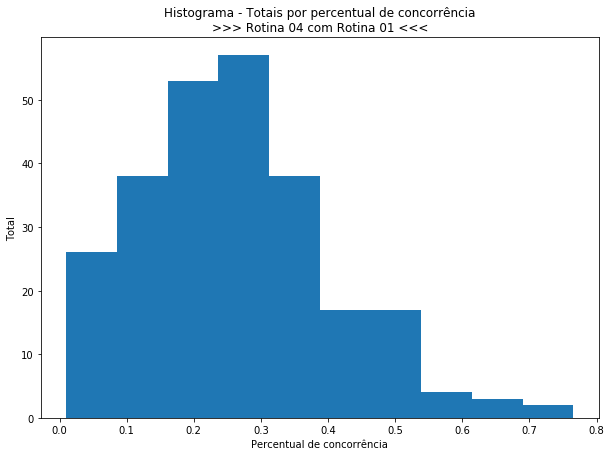

In [102]:
# >>> Rotina 04 com Rotina 01 <<<
df=BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']> 0)]['PercRotina_01']
plt.subplots(figsize =(10, 7)) 
plt.title('Histograma - Totais por percentual de concorrência\n>>> Rotina 04 com Rotina 01 <<<')
plt.xlabel('Percentual de concorrência')
plt.ylabel('Total')
plt.hist(df, bins=10)
plt.show()

# Neste caso podemos observar que a maior quantidade de casos ocorre para percentuais de até quase 40% de concorrência
# Acima de uns 53% de concorrências são poucos casos

In [ ]:
# Dados Constatados até o momento

# 1 - Rotina 04 com Rotina 01
#   Neste caso podemos observar que a maior quantidade de casos ocorre para percentuais de até quase 40% de concorrência
#   Acima de uns 52% de concorrências são poucos casos


In [105]:
#  Rotina 04 impactada pela Rotina 01
print("==>>> Rotina 04 impactada pela Rotina 01")
print("\n\nDescrive Percentuais")
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0)]['PercRotina_01'].describe())
print("\nDescrive Tempo Processamento")
print(BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0)]['TempoMinutos'].describe())

# Podemos obervar que praticamente a metade dos casos estão abaixo do tempo médio de processamento

==>>> Rotina 04 impactada pela Rotina 01


Descrive Percentuais
count    255.000000
mean       0.261159
std        0.141528
min        0.009877
25%        0.160476
50%        0.255639
75%        0.338769
max        0.765625
Name: PercRotina_01, dtype: float64

Descrive Tempo Processamento
count    255.000000
mean     370.427451
std       95.488681
min      128.000000
25%      295.500000
50%      365.000000
75%      432.500000
max      597.000000
Name: TempoMinutos, dtype: float64


In [106]:
# Criação de DataFrame conforme o tipo de impacto a ser avaliado:
# a) Rotina 04 impactada pela Rotina 01

# DF será usado para comparar o desempenho geral, sem concorrência (0%) e com concorrência(>0%)

# a) Rotina 04 impactada pela Rotina 01
DF_Proc04_Full               = BDFULL.loc[(BDFULL['Processo']=='Rotina_04')]
DF_Proc04_0_Perc_Proc01      = BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']==0)]
DF_Proc04_Mais_0_Perc_Proc01 = BDFULL.loc[(BDFULL['Processo']=='Rotina_04') & (BDFULL['PercRotina_01']>0)]



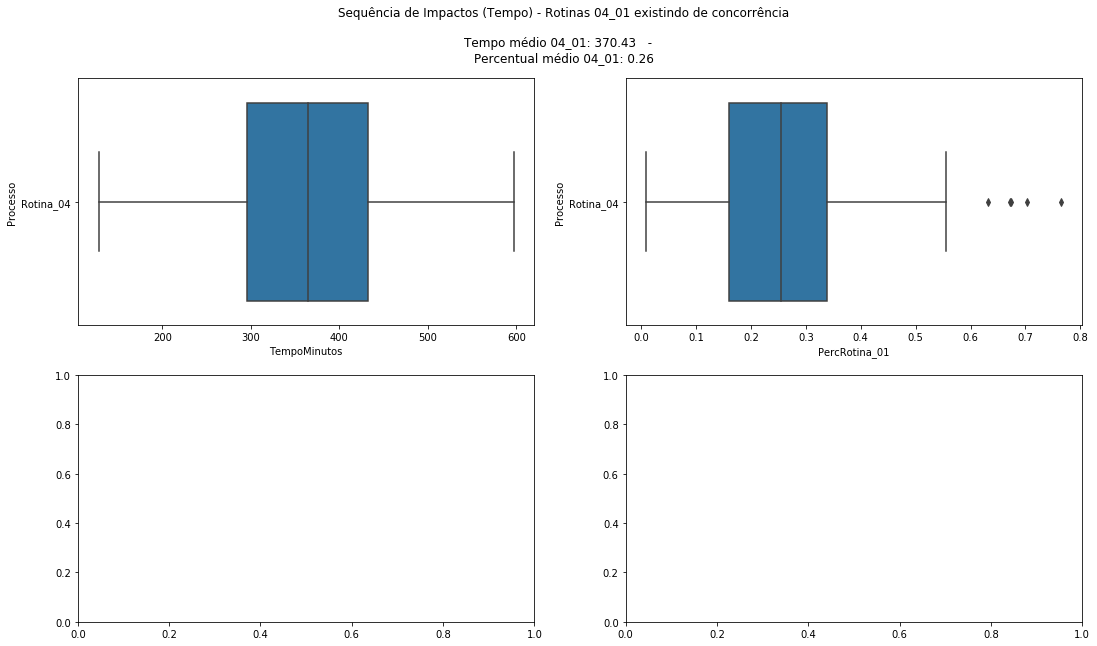

In [129]:
# Avaliando com BoxPlot - Média de Tempo e Percentual de Processamento
# Processos 01_04 e 02_10

tempoMedio_04_01 = DF_Proc04_Mais_0_Perc_Proc01['TempoMinutos'].mean()
percentualMedio_04_01 = DF_Proc04_Mais_0_Perc_Proc01['PercRotina_01'].mean()

titulo = ('Sequência de Impactos (Tempo) - Rotinas 04_01 existindo de concorrência' +
          '\n\nTempo médio 04_01: ' + str(round(tempoMedio_04_01, 2)) + '   -   ' +
          '\nPercentual médio 04_01: ' + str(round(percentualMedio_04_01, 2)) )

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle(titulo)

# Gráfico Rotina 04_01
sns.boxplot(ax=axes[0, 0], x="TempoMinutos", y="Processo", data=DF_Proc04_Mais_0_Perc_Proc01)

# Gráfico Rotina 04_01
sns.boxplot(ax=axes[0, 1], x="PercRotina_01", y="Processo", data=DF_Proc04_Mais_0_Perc_Proc01)

plt.show()

In [132]:
# Rotina 04 impactada pela Rotina 01
print('===>> Rotina 01 impactada pela Rotina 04')
print('\nTotal de Casos Geral:', DF_Proc04_Full['TempoMinutos'].count() )
print("\n0 %")
print(DF_Proc04_0_Perc_Proc01['TempoMinutos'].count())
print(DF_Proc04_0_Perc_Proc01['TempoMinutos'].mean())
print()
print("Mais que 0 %")
print(DF_Proc04_Mais_0_Perc_Proc01['TempoMinutos'].count())
print(DF_Proc04_Mais_0_Perc_Proc01['TempoMinutos'].mean())

===>> Rotina 01 impactada pela Rotina 04

Total de Casos Geral: 359

0 %
104
345.3076923076923

Mais que 0 %
255
370.42745098039217


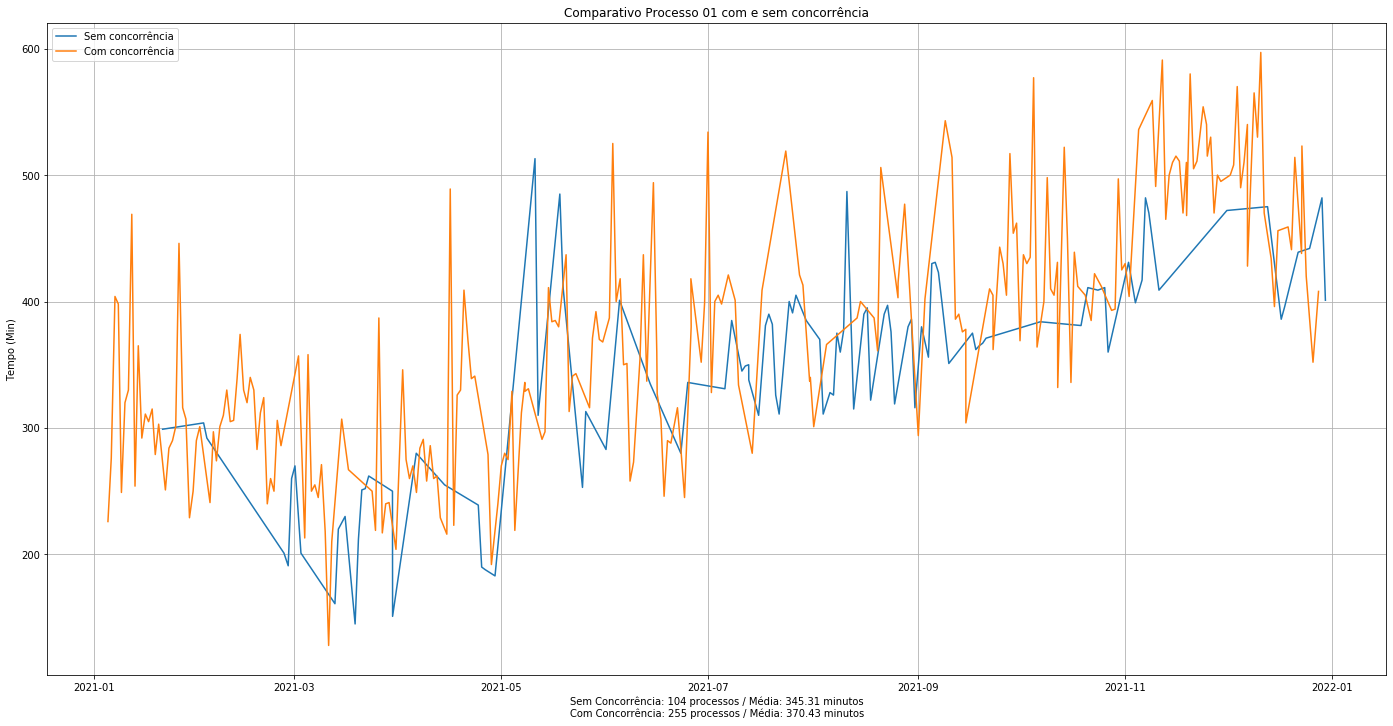

In [135]:
# Comparativo Processo 04 com e sem concorrência

# Define sumarização de tempos e quantidades
totalProcessos04_SemConcorrencia = str(DF_Proc04_0_Perc_Proc01['TempoMinutos'].count())
mediaTempoProcessos04_SemConcorrencia = str(round(DF_Proc04_0_Perc_Proc01['TempoMinutos'].mean(),2))
totalProcessos04_ComConcorrencia = str(DF_Proc04_Mais_0_Perc_Proc01['TempoMinutos'].count())
mediaTempoProcessos04_ComConcorrencia = str(round(DF_Proc04_Mais_0_Perc_Proc01['TempoMinutos'].mean(),2))

textoTotais = "Sem Concorrência: " + totalProcessos04_SemConcorrencia + " processos / Média: " + mediaTempoProcessos04_SemConcorrencia + " minutos"
textoTotais = textoTotais + "\nCom Concorrência: " + totalProcessos04_ComConcorrencia + " processos / Média: " + mediaTempoProcessos04_ComConcorrencia + " minutos" 

# gerando os dados para plotagem
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot()

#ax.plot(DF_Proc04_Full['DtHoraInicio'], DF_Proc04_Full['TempoMinutos'], label='Geral')
ax.plot(DF_Proc04_0_Perc_Proc01['DtHoraInicio'], DF_Proc04_0_Perc_Proc01['TempoMinutos'], label='Sem concorrência')
ax.plot(DF_Proc04_Mais_0_Perc_Proc01['DtHoraInicio'], DF_Proc04_Mais_0_Perc_Proc01['TempoMinutos'], label='Com concorrência')

# definindo o nome dos eixos e Título
ax.set_title('Comparativo Processo 01 com e sem concorrência')
ax.set_xlabel(textoTotais)
ax.set_ylabel('Tempo (Min)')

# adicionando grid e legenda
plt.grid()
ax.legend()

In [ ]:
# Pelo gráfico gerado, "aparentemente" está claro que os casos "com concorrência" tem um tempo maior de processamento quando 
# comparado aos casos "sem concorrência".

In [ ]:
# AVALIANDO CORRELAÇÕES

In [173]:
DF_Proc04_Mais_0_Perc_Proc01.corr()

,TempoMinutos,TempoMinutosInicioExecucao,PercRotina_01,PercRotina_02,PercRotina_03,PercRotina_04,DiaSemana_Domingo,DiaSemana_Quarta,DiaSemana_Quinta,DiaSemana_Segunda,DiaSemana_Sexta,DiaSemana_Sábado,DiaSemana_Terça
TempoMinutos,1.000000,0.496199,-0.331690,-0.199779,-0.038099,NaN,-0.050300,-0.025681,-0.015083,0.075643,0.076559,-0.030417,-0.030539
TempoMinutosInicioExecucao,0.496199,1.000000,-0.434865,-0.375770,0.119649,NaN,-0.033829,0.000427,0.054301,-0.004856,0.030347,-0.022034,-0.032600
PercRotina_01,-0.331690,-0.434865,1.000000,0.435118,-0.052530,NaN,0.097156,0.074942,-0.029046,0.043103,-0.144637,0.082687,-0.111011
PercRotina_02,-0.199779,-0.375770,0.435118,1.000000,-0.135303,NaN,0.088359,0.052546,-0.004466,0.006770,-0.088090,0.021255,-0.070487
PercRotina_03,-0.038099,0.119649,-0.052530,-0.135303,1.000000,NaN,0.071604,0.026843,-0.088375,-0.012517,-0.006281,0.028070,-0.013610
PercRotina_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiaSemana_Domingo,-0.050300,-0.033829,0.097156,0.088359,0.071604,NaN,1.000000,-0.164137,-0.174172,-0.140504,-0.176648,-0.159028,-0.151225
DiaSemana_Quarta,-0.025681,0.000427,0.074942,0.052546,0.026843,NaN,-0.164137,1.000000,-0.185822,-0.149902,-0.188464,-0.169665,-0.161340
DiaSemana_Quinta,-0.015083,0.054301,-0.029046,-0.004466,-0.088375,NaN,-0.174172,-0.185822,1.000000,-0.159067,-0.199987,-0.180038,-0.171205
DiaSemana_Segunda,0.075643,-0.004856,0.043103,0.006770,-0.012517,NaN,-0.140504,-0.149902,-0.159067,1.000000,-0.161328,-0.145236,-0.138110


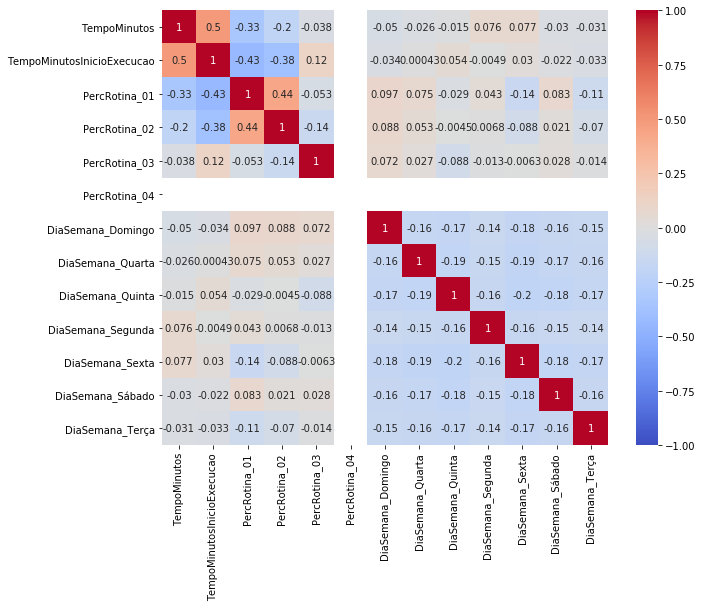

In [140]:
# Correlação 04_01
plt.figure(figsize=(10, 8))
sns.heatmap(DF_Proc04_Mais_0_Perc_Proc01.corr(), vmin = -1, vmax = +1, 
            annot = True, #mostrar os percentuais nas caixas
            cmap = 'coolwarm')

In [ ]:
# No gráfico acima não é mostrada nenhuma informação para o PercRotina4 pois como se trata 
# de um DF cujo filtro é somente a rotina 4, então o percentual é sempre 4 para todas linhas,
# com isso não gera correlaçao

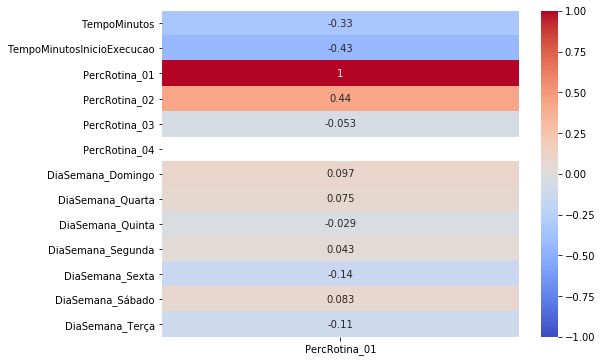

In [181]:
# Mostra correlação por um único campo - base com concorrência > 0
plt.figure(figsize=(8, 6))
sns.heatmap(DF_Proc04_Mais_0_Perc_Proc01.corr()[['PercRotina_01']], vmin = -1, vmax = +1, 
            annot = True, #mostrar os percentuais nas caixas
            cmap = 'coolwarm')
plt.show()

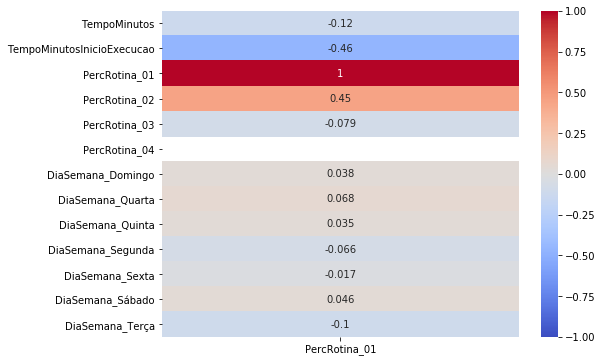

In [186]:
# Mostra correlação por um único campo - base geral com e sem concorrência
plt.figure(figsize=(8, 6))
sns.heatmap(DF_Proc04_Full.corr()[['PercRotina_01']], vmin = -1, vmax = +1, 
            annot = True, #mostrar os percentuais nas caixas
            cmap = 'coolwarm')
plt.show()

In [187]:
# Conforme avaliado acima, não existe correlação do percentual de concorrência com o tempo de execução da rotina

In [191]:
#*****************
#https://acervolima.com/python-teste-de-correlacao-de-pearson-entre-duas-variaveis/
    
import pandas as pd 
from scipy.stats import pearsonr 

# FULL
list1 = DF_Proc04_Full['PercRotina_01'] 
list2 = DF_Proc04_Full['TempoMinutos'] 
corr, _ = pearsonr(list1, list2) 
print('FULL - Pearsons correlation: %.3f' % corr)

# 0% (sem concorrência)
print('0% Sem concorrência - PercRotina_01 = 0 para todas linhas - não há correlação')

# mais 0% (com correlação)
list1 = DF_Proc04_Mais_0_Perc_Proc01['PercRotina_01'] 
list2 = DF_Proc04_Mais_0_Perc_Proc01['TempoMinutos'] 
corr, _ = pearsonr(list1, list2) 
print('Com concorrência - Pearsons correlation: %.3f' % corr)




FULL - Pearsons correlation: -0.118
0% Sem concorrência - PercRotina_01 = 0 para todas linhas - não há correlação
Com concorrência - Pearsons correlation: -0.332
